## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In [ ]:
# I acknowledge that I have used AI to the extent permitted by the UVA
# AI acceptable use policy. I acknowlegde that I am aware of the possibility
# of AI producing errors and offensive content and certify that I
# have taken the necessary measures to ensure that the work produced is both
# accurate and ethical to the best of my ability.

In [ ]:
# Question 1.1 What is the difference between regression and classification?

# These are both types of predictors. The difference is in what exactly they predict.
# Regression is when we use algorithms and models to predict numeric outcomes.
# Classification is when we use the same methods to predict categorical outcomes.

In [ ]:
# Question 1.2 What is a confusion table? What does it help us understand about
# a model's performance?

# A confusion table is a way to test the fit of a predictive model on the actual
# data set for categorical data sets. It's a cross-tabulation of predicted values
# with actual values and it helps us understand how well a predictive model "fits"
# the actual data we give it. It looks for patterns in the predicted result and
# actual results, allowing us to record and analyze trends. "Accuracy" is how we
# quantify how "correct" the predictive model is.

In [ ]:
# Question 1.3 What does the SSE quantify about a particular model?

# The SSE (sum of squared errors) quantifies a model's accuracy. In other words,
# it quantifies how far a model's predicted values fall from the true values
# it's being used to predict.

In [ ]:
# Question 1.4 What are overfitting and underfitting?

# Essentially, overfitting and underfitting are ways to look at a models sensitivity
# and complexity -- whether they're overly exacting or overly simplistic.
# "Overfitting" is when a model examines a test data set and adapts to it's data
# points and characteristics too well, meaning that it has greater error with a real data set
# versus a training data set. "Underfitting" is when your model is too
# simple and general and pays too little attention to the characteristic and traits of the
# training data (meaning it has higher error for the training AND real data sets it
# processes). If K is very small, it will lead to overfitting. It is very large, underfitting.

In [ ]:
# Question 1.5 Why does splitting the data into training and testing sets,
# and choosing  𝑘  by evaluating accuracy or SSE on the test set, improve model performance?

# This method improves model performance because it enables us to see how the model
# adapts to the "test set" (a set the model hasn't seen) to ensure that overfitting
# or underfitting hasn't occured. When choosing k by evaluating accuracy/SSE on the test set,
# we can make sure that the K doesn't lead to overfitting by being overly reliant on the
# training data. This way, we strike a balance between accuracy and applicability.
# The k is somewhere in the middle, meaning it will use the training data to yield a k
# that we can then use to extract meaningful and trustworthy predictions when used
# later on other test sets. Were we to choose K by accuracy/SSE on the training set,
# we would get a model that overfits and is too sensitive to the training set
# (since the model's only reference is the training set).

In [ ]:
# Question 1.6 With classification, we can report a class label as a prediction
# or a probability distribution over class labels. Please explain the strengths
# and weaknesses of each approach.

# Class labels as predictions -
# The benefit to reporting class labels as predictions is that it enables us to examine
# the relative likelihood of one class label to the others. In other words, we can
# make a singular prediction that P class label is the most likely label to occur.
# The downside is that this doesn't give us a comprehensive overview each class label's
# relative likelihood. For instance, P may be the MOST likely class, but perhaps Q
# and R are also both pretty likely to happen, making a class label as prediction
# approach somewhat limiting in understanding the liklihood of all the possible outcomes.


# Probability distribution over class labels -
# Similarly, a probibility distribution over class labels approach gives us a broader view
# into all the different class labels' relative liklihood. However, this method lacks
# the specialized insight into a singular class label's liklihood, as well as being
# overly sensitive to skewed data. Let's say that there were 10 concentrated entries for P
# and Q was an outlier. This method might give Q unfairly increased representation.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [70]:
# Question 2.1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

cars = pd.read_csv("USA_cars_datasets.csv")

cars_test = cars[["price", "year", "mileage"]]

print("Missing values per column:\n", cars_test.isna().sum())

print(cars_test.head(10))

print(cars_test.shape)


Missing values per column:
 price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
5   5700  2018    45561
6   7300  2010   149050
7  13350  2017    23525
8  14600  2018     9371
9   5250  2017    63418
(2499, 3)


In [71]:
# Question 2.2
def maxmin(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))

cars_test['year'] = maxmin(cars_test['year'])
cars_test['mileage'] = maxmin(cars_test['mileage'])

/tmp/ipython-input-3755963351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test['year'] = maxmin(cars_test['year'])
/tmp/ipython-input-3755963351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test['mileage'] = maxmin(cars_test['mileage'])


In [72]:
# Question 2.3
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars_test, test_size=0.2, random_state=42)

print("Training set shape:", train_set.shape)
print("Evaluation set shape:", test_set.shape)

Training set shape: (1999, 3)
Evaluation set shape: (500, 3)


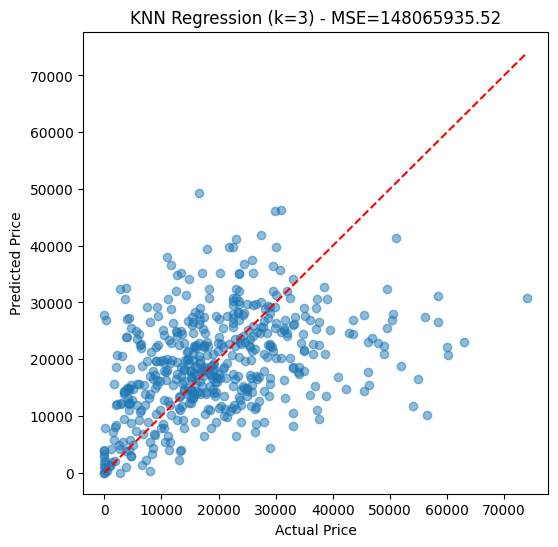

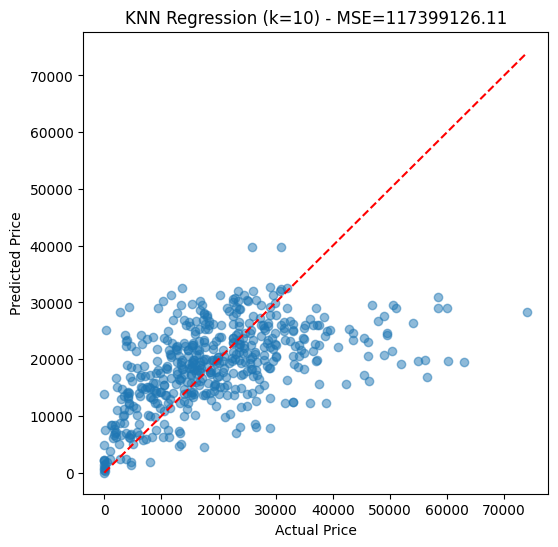

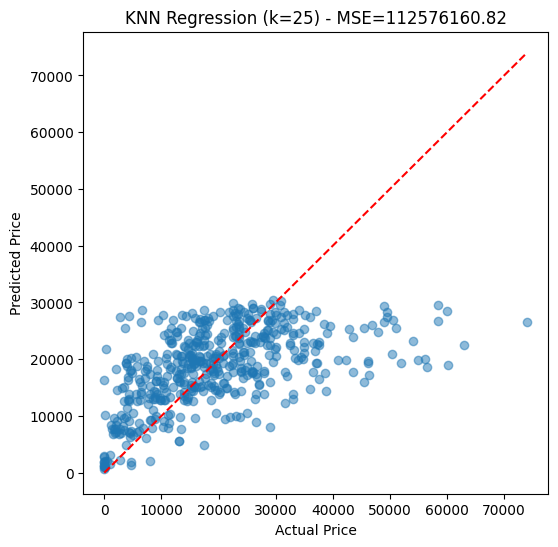

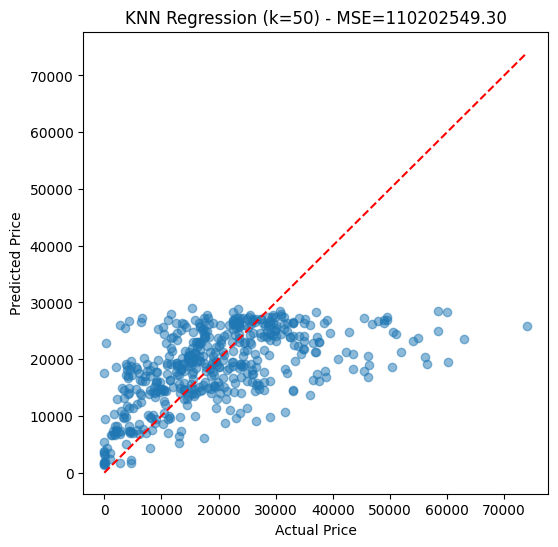

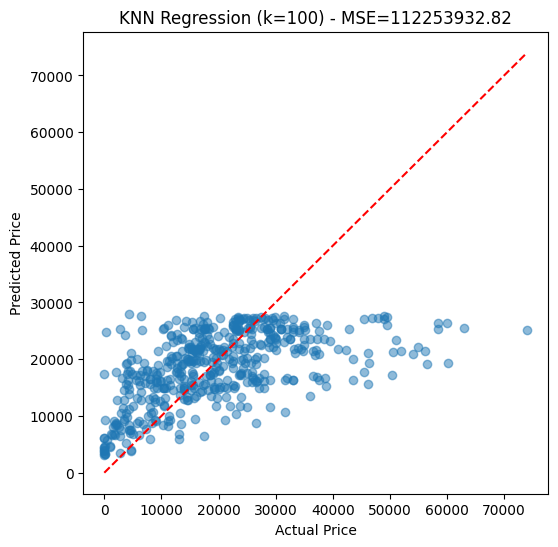

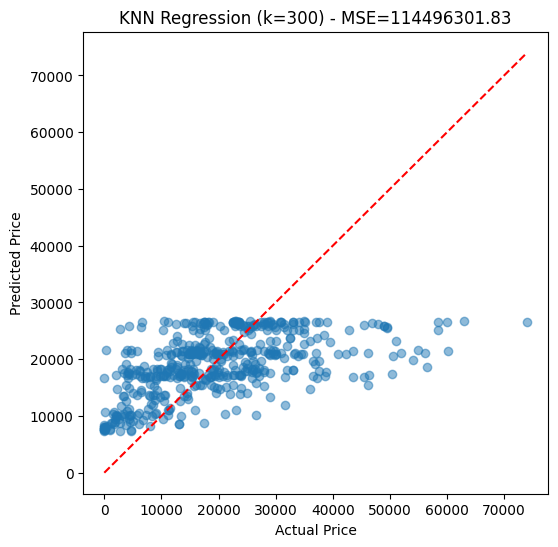

Mean Squared Errors by k:
k=3: MSE=148065935.52
k=10: MSE=117399126.11
k=25: MSE=112576160.82
k=50: MSE=110202549.30
k=100: MSE=112253932.82
k=300: MSE=114496301.83


In [73]:
# Question 2.4

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train = train_set[["year", "mileage"]]
y_train = train_set["price"]
X_test = test_set[["year", "mileage"]]
y_test = test_set["price"]

k_values = [3, 10, 25, 50, 100, 300]

results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    results[k] = mse

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"KNN Regression (k={k}) - MSE={mse:.2f}")
    plt.show()

print("Mean Squared Errors by k:")
for k, mse in results.items():
    print(f"k={k}: MSE={mse:.2f}")


# I notice that as K increases, the data become more concentrated along the
# perfect fit line. Additionally, the data seem to concentrate below 30000 at K=300
# and expand outward along the x axis. At k's lowest (k=3), the data seem to be the
# most evenly spread.


Optimal k: 49
Minimum SSE: 54965611267.69554


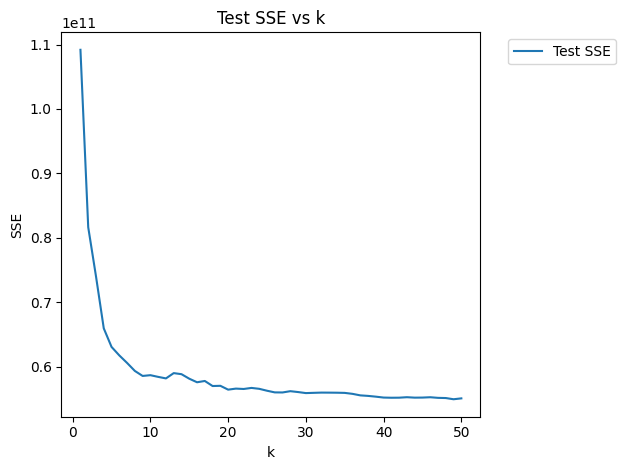

In [74]:
# Question 2.5 Determine the optimal  𝑘  for these data.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

y = cars_test['price']
X = cars_test[['year','mileage']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_bar = 50
SSE = []

for k in range(1, k_bar + 1):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum((y_test - y_hat) ** 2))

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)[0][0]
k_star = min_index + 1

print("Optimal k:", k_star)
print("Minimum SSE:", SSE_min)

plt.plot(np.arange(1, k_bar + 1), SSE, label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Test SSE vs k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# The optimal K would be 49 since it yields the lowest SSE.

In [ ]:
# Question 2.6 Describe what happened in the plots of predicted versus actual prices as  𝑘  varied,
# taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

# We can see that as k increases, the scatter plot data become incresingly concentrated
# and confined between the y values of roughly 7000 and 26000. In other words, as k increases,
# the model gradually moves from overfitting the data (being overly specific and complex)
# to underfitting the data (being too simplistic and unspecific). K = 3 results in
# a model that overfits the data as evidenced by its wide dispersion of data amongst the graph.
# As K increases, it becomes more concentrated, meaning that its underfitting and
# yielding predictions that don't fully display the features of the data set.
# The optimal K of 49 is reflected in the k=50 as it displays the actual vs. predicted data
# being the most balanced between overfitting and underfitting.


**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [ ]:
## ----- DON'T DO ------ ##